In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the mnist data from keras.dataset


In [ ]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
x_test.shape


(10000, 28, 28)

In [ ]:
y_train.shape


(60000,)

In [ ]:
y_test.shape

(10000,)

Training Data= 60000
Test Data=10000
Image dimension= 28*28
Grayscale image

In [ ]:
print(x_train[10].shape)

(28, 28)


In [ ]:
#converting image from numpy array to displayable

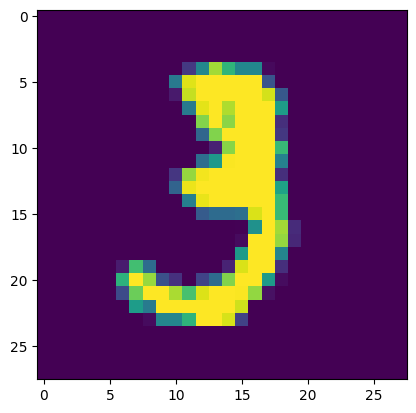

In [ ]:
plt.imshow(x_train[10])
plt.show()


In [ ]:
print(y_train[10])

3


both number matches


image labels-


In [ ]:
print(y_train.shape , y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply one hot encoding

In [ ]:
#scaling the values


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

building a neural network

In [ ]:
#setting up the layers of my neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
#compiling the model
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
#training the network

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2996 - accuracy: 0.9120
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1047 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0709 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0611 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0457 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0424 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

training data accuracy=98.79%)

In [ ]:
# accuracy on test data:

loss, accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1077 - accuracy: 0.9701


test data accuracy= 97% accurate

In [ ]:
print(x_test.shape)

(10000, 28, 28)


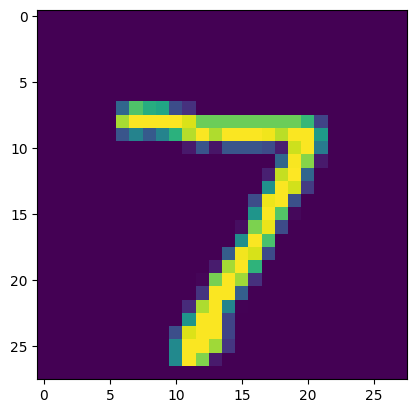

In [ ]:
#first data point in x_test

plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred= model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[9.7246906e-03 2.1134449e-02 8.4497178e-01 9.7585356e-01 1.7214017e-05
 2.0154056e-03 6.7387712e-10 9.9999750e-01 5.5321880e-02 2.1645656e-01]


model.predict gives the prediction probability of each class for that datapoint

In [ ]:
#converting the prediction probabilities to class label

In [ ]:
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the prediction probabilities to class label for all test data points
y_pred_labels= [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(y_test)

[7 2 1 ... 4 5 6]


using confusion matrix

In [ ]:
conf_mat= confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 960    0    3    1    1    7    5    1    2    0]
 [   0 1123    2    2    0    2    1    0    5    0]
 [   5    1  992   10    3    1    4    6   10    0]
 [   0    0    4  974    1   22    0    3    3    3]
 [   3    0    1    1  941    3    6    5    2   20]
 [   2    0    0    3    1  876    2    2    3    3]
 [   3    3    0    1    6    6  934    0    5    0]
 [   1    7    8   11    2    0    0  983    5   11]
 [   3    1    2    4    4   13    1    3  938    5]
 [   1    3    0    5    5    8    0    3    3  981]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted labels')

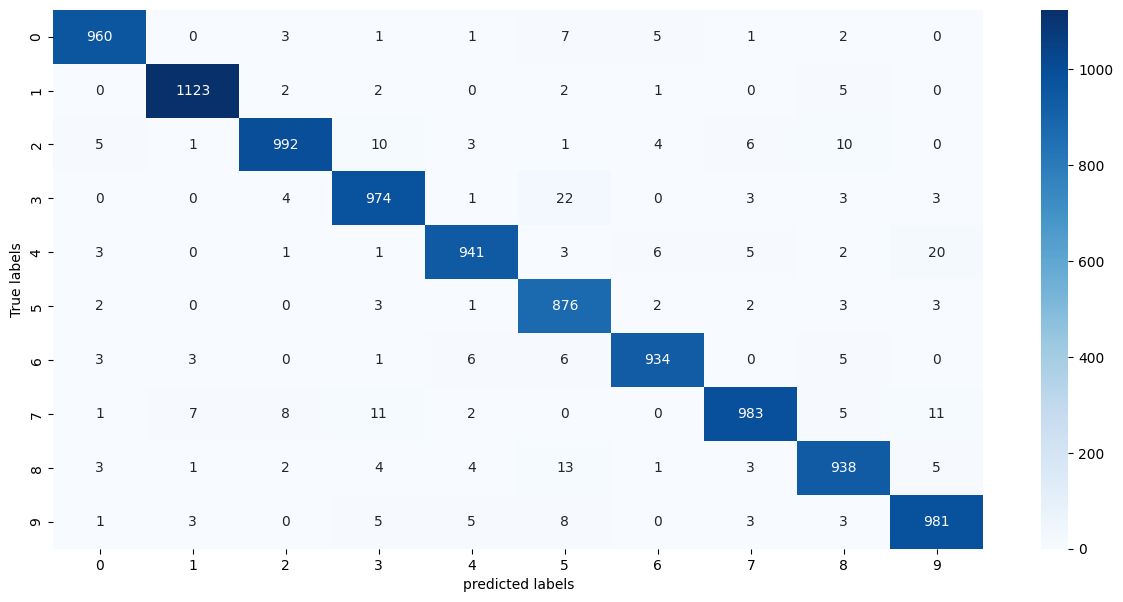

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot =True , fmt='d', cmap='Blues')
plt.ylabel("True labels")
plt.xlabel("predicted labels")

best accuracy for 1 image as seen from above

Now, building a predictive system

In [ ]:
input_image_path='/content/mnist1.jpeg'

In [ ]:
input_img=cv2.imread(input_image_path)

In [ ]:
type(input_img)

numpy.ndarray

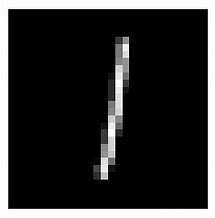

In [ ]:
cv2_imshow(input_img)

In [ ]:
input_img.shape

(218, 215, 3)

In [ ]:
grayscale = cv2.cvtColor(input_img , cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(218, 215)

In [ ]:
input_img=grayscale

In [ ]:
input_img_resized=cv2.resize(input_img, (28,28))

In [ ]:
input_img_resized.shape

(28, 28)

In [ ]:
cv2_imshow(input_img_resized)

In [ ]:
input_img_resized=input_img_resized/255

converting it to a single array so that it can be fed to the model

In [ ]:
image_reshaped= np.reshape(input_img_resized, [1,28,28])

In [ ]:
input_pred= model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 19ms/step
[[1.1062952e-03 3.9168212e-01 9.9943262e-01 1.5610734e-01 3.4051966e-13
  7.3590083e-05 5.0904050e-15 1.0000000e+00 2.3766266e-05 2.8316868e-02]]


In [ ]:
input_pred_label= np.argmax(input_pred)
print(input_pred_label)

7
